In [69]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from sklearn.linear_model import LinearRegression
import csv

usedir = 'C:\\Users\\tup54227\\Documents\\GitHub\\istart-sharedreward\\derivatives'
os.chdir(usedir)

df = pd.read_excel("ppi_wholebrain_scatterplot.xls")

fig=sns.lmplot(y="act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13",x="RS", data=df, order=2)

SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

In [70]:
temp = df
ASRD = pd.read_csv('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward/Behavioral_Analysis/Data_Out/AllSharedRewardData.csv')
APD = pd.read_excel('ISTART-ALL-Combined-042122.xlsx')
keepios = [col for col in APD.columns if col.startswith('ios') or col.startswith('sub')]
keepwinlose = [col for col in ASRD.columns if col.startswith('Win') or col.startswith('Lose') or col.startswith('sub')]
temp = pd.merge(APD[['sub','dudit_drugtype','audit_standard_score']], temp, on='sub', how = 'right')
temp = pd.merge(APD[keepios], temp, on = 'sub', how = 'right')
temp = pd.merge(ASRD[keepwinlose], temp, on='sub', how='right')
temp999 = temp.drop_duplicates(subset=['Subject']).dropna(subset=['Subject'])

df = temp999.replace(999, np.NaN)
df['ios_p']
df['ios_diff_computer'] = df['ios_p'] - df['ios_computer'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['ios_diff_stranger'] = df['ios_p'] - df['ios_fu_score']
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df['Win_F_S'] = df['Win-Friend'] - df['Win-Stranger']
df['Diff_Friend'] = df['Win-Friend'] - df['Lose-Friend']
df['Diff_Stranger'] = df['Win-Stranger'] - df['Lose-Stranger']
df['Diff_Comp'] = df['Win-Comp'] - df['Lose-Comp']
df['Win_Lose_F_S'] = df['Diff_Friend'] - df['Diff_Stranger']
df['Win_Lose_F_C'] = df['Diff_Friend'] - df['Diff_Comp']
df['aTPJ_R_P_F_C'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_02'] - df['aTPJ_VS_ppi_cope_01'])
df['aTPJ_R_P_F_S'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_06'] - df['aTPJ_VS_ppi_cope_05'])
df['pTPJ_R_F_S'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_06'])
df['pTPJ_R_P_F_C'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_02'] - df['pTPJ_VS_ppi_cope_01'])
df['pTPJ_R_P_F_S'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_06'] - df['pTPJ_VS_ppi_cope_05'])
df_ios = df.dropna(subset=['ios_diff_computer'])
df_psr = df.dropna(subset = ['Win_F_S'])
df_both = df_psr.dropna(subset=['ios_diff_computer'])

pd.set_option('display.max_columns', None)


,sub,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_fu_score,ios_computer,ios_f,ios_p,audit_standard_score,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-15_rew_S-C,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster3_type-ppi_seed-VS_thr5_cope-23,Unnamed: 19,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 27,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,VS_seed_F_S,VS_seed_F_C,win_C,win_F,win_S,Unnamed: 46,act_c14_VS-wholebrain_rew-F-S_zstat1_cluster1,act_VS-seed_11-rew-pun_F-S,act_VS-seed_13-rew-pun_F-C,act_VS-seed_14-rew_F-S,act_VS-seed_16-rew_F-C,act_VS-seed_21-rew_F-SC,act_VS-seed_23-rew-pun_F-SC,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,Diff_Friend,Diff_Stranger,Diff_Comp,Win_Lose_F_S,Win_Lose_F_C,aTPJ_R_P_F_C,aTPJ_R_P_F_S,pTPJ_R_F_S,pTPJ_R_P_F_C,pTPJ_R_P_F_S
sub,1.000000,0.210677,0.018209,-0.064223,-0.258335,-0.112806,0.029783,0.295178,0.516673,-0.110746,0.226164,-0.219825,1.000000,NaN,0.028663,-0.009318,0.022582,0.020976,-0.225917,-0.160756,0.080632,-0.236236,-0.212544,-0.212544,-0.325313,0.365077,-0.005647,-0.025779,-0.224732,-0.245388,0.193609,NaN,-0.037861,-0.004040,-0.002356,-0.076834,0.043411,-0.003552,0.043058,NaN,0.132645,-0.071749,0.062387,0.032203,0.143899,0.196531,0.008458,0.033152,0.084381,0.081624,0.063589,0.208922,0.001424,0.002245,-0.053829,-0.089022,-0.074603,NaN,-0.054662,-0.155793,-0.032219,-0.001627,-0.000560,0.016137,-0.084899,-0.240417,-0.057178,0.186296,0.140259,0.287227,0.072188,-0.075042,0.195441,0.304631,0.084518,-0.062628,-0.116049,-0.022210,-0.099211
Win-Friend,0.210677,1.000000,0.370690,0.184113,-0.357843,-0.188540,-0.104751,0.115235,0.165314,0.133584,0.259066,-0.093963,0.210677,NaN,0.015867,0.197580,0.205017,0.040419,0.029235,-0.014366,0.129401,-0.131592,-0.024713,-0.024713,-0.174288,0.037188,0.100681,0.032453,0.029236,-0.056719,-0.085656,NaN,-0.082075,-0.167179,-0.011502,-0.171501,-0.137950,0.121974,-0.062409,NaN,-0.124366,0.007592,-0.136202,0.013607,-0.016953,-0.032629,-0.123637,-0.148848,0.121806,0.012328,-0.082896,0.042277,-0.200918,-0.108250,0.072836,-0.069059,0.164088,NaN,-0.092697,-0.293057,-0.237564,-0.211997,-0.106653,-0.191906,-0.307728,0.129356,0.157184,0.436776,0.383034,0.769962,0.356138,0.227668,0.375220,0.480745,0.025315,0.113704,-0.027549,-0.043505,-0.131407
Win-Stranger,0.018209,0.370690,1.000000,0.366279,-0.236899,-0.331007,-0.212895,0.234587,0.199954,0.402362,0.364223,-0.090160,0.018209,NaN,-0.010748,-0.016938,0.018112,0.138779,0.108173,0.074172,0.210317,-0.061106,0.004363,0.004363,-0.378708,0.063813,0.116763,-0.024806,-0.235664,-0.236727,-0.124392,NaN,-0.161626,-0.111680,-0.191375,-0.337429,-0.470229,0.088940,-0.017393,NaN,-0.268776,-0.026257,-0.003325,-0.031943,-0.045264,-0.137644,-0.260942,0.117044,0.094549,0.058810,-0.008100,-0.045792,-0.061830,-0.287207,0.416337,0.191455,0.231561,NaN,-0.325337,-0.048908,-0.242424,-0.059463,-0.284581,-0.216881,-0.201713,0.224883,0.190

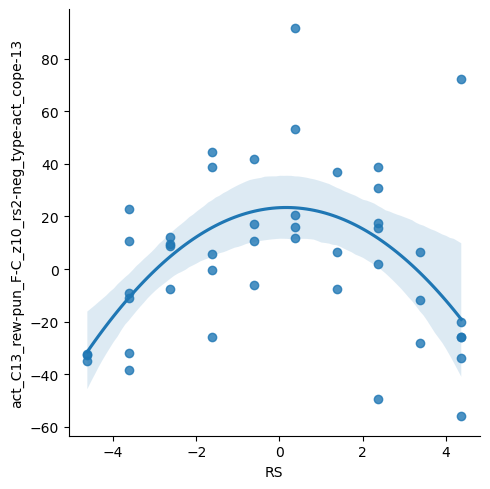

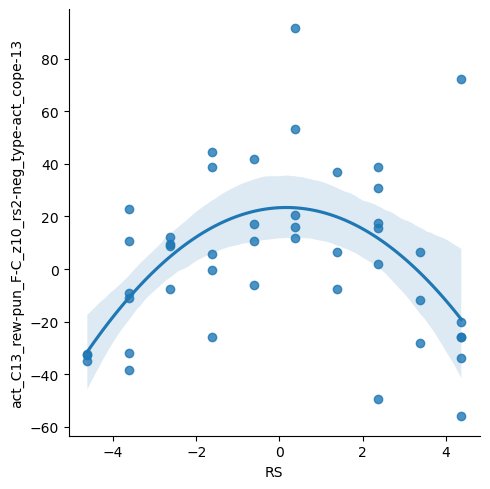

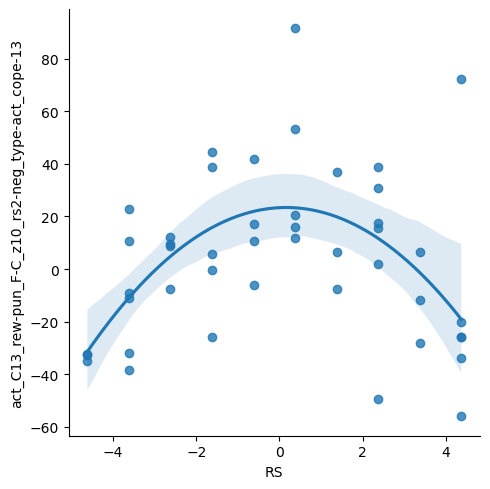

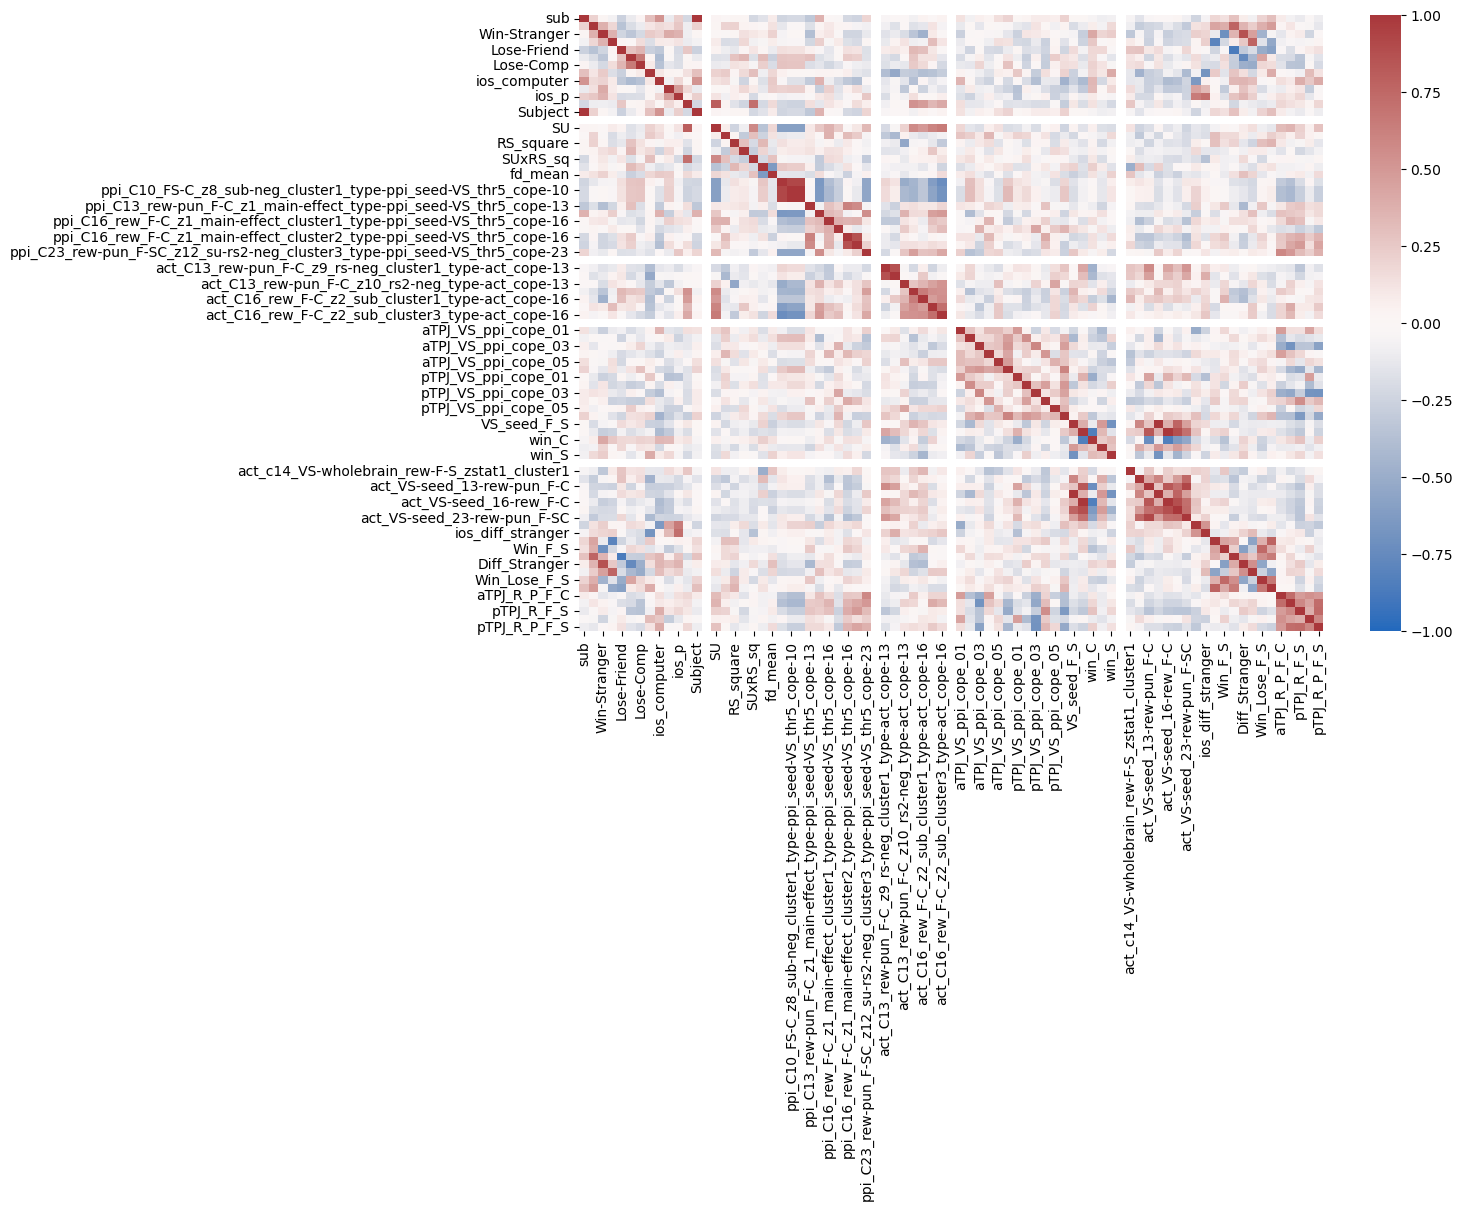

[0, nan, 0, 1, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1, nan, 1, nan, nan, nan, '1,5', nan, nan, nan, 1, 1, nan, nan, 1, nan, 1, nan, 1, nan, nan, nan, 1, '1,5', 1, nan, nan, 1, nan, nan, '1,2', nan] [6.666666667, 1.0, 1.0, 14.0, 0.0, 0.0, 2.222222222, 13.0, 1.0, 5.0, 3.0, 10.0, 3.0, 7.0, 0.0, 3.0, 2.0, 6.0, 0.0, 4.0, 2.0, 1.0, 5.0, 6.0, 11.0, 2.0, 0.0, 3.0, 5.555555556, 8.0, 5.0, 2.0, 1.0, 0.0, 1.0, 5.0, 1.0, 1.0, 3.0, 0.0, 6.0, 1.0, 0.0, 5.0, 5.0] [0 nan 1 '1,5' '1,2']


45

In [71]:
cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat,cmap='vlag',vmin=-1)
plt.show()
drug_type_list = df['dudit_drugtype'].tolist()
audit_score_list = df['audit_standard_score'].tolist()
print(drug_type_list, audit_score_list, df['dudit_drugtype'].unique())
len(audit_score_list)

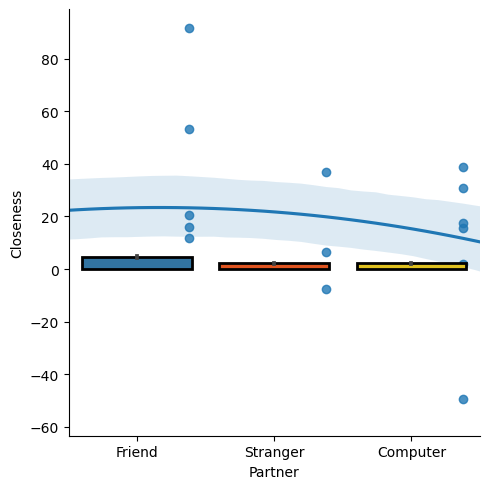

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Partner 30.4960 2.0000 54.0000 0.0000



In [20]:
# ios_means = pd.DataFrame({
#     'Partner': ['Friend', 'Stranger', 'Computer'],
#     'Mean Closeness': [df_ios['ios_p'].mean(),df_ios['ios_fu_score'].mean(),df_ios['ios_computer'].mean()]})

plt_df = df_ios[['Subject', 'ios_p', 'ios_fu_score','ios_computer']].copy()
plt_df.columns = ['Subject', 'Friend', 'Stranger', 'Computer']
plt_df = plt_df.melt(id_vars=['Subject'], value_vars=['Friend', 'Stranger', 'Computer'], var_name='Partner', value_name='Closeness')
fig_closeness = sns.barplot(x = 'Partner', y = 'Closeness',data=plt_df, ci=68,
                            palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth=2)
#plt.savefig('../../istart-sharedreward/derivatives/Figures/mean_closeness.svg')
plt.show()


plt_df_anova = AnovaRM(plt_df, 'Closeness', 'Subject', within=['Partner'])
plt_df_results = plt_df_anova.fit()

print(plt_df_results)

# plt.hist(df['SU'], edgecolor='k')
# plt.show()
# print('\t\t   Individual Differences - Substance Use\n')

# plt.hist(df['RS'], edgecolor='k')
# plt.show()
# print('\t\t   Individual Differences - Reward Sensitivity\n')

# plt.hist(df['RS_square'], edgecolor='k')
# plt.show()
# print('\t\t   Individual Differences - Reward Sensitivity Squared\n')

Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.3746133442589799 ; p: 0.01123390641902428


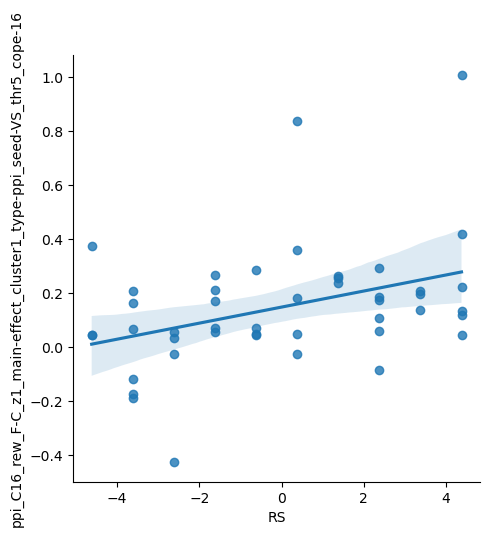

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.3594765837245274 ; p: 0.015297112260920136


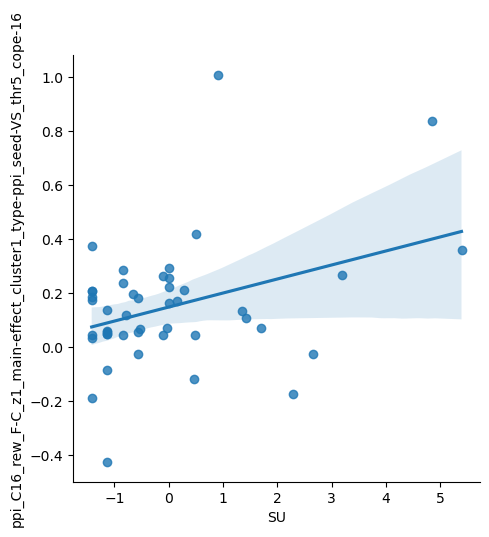

<class 'seaborn.axisgrid.FacetGrid'>
RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.13618626962191308 ; p: 0.3723804261097893


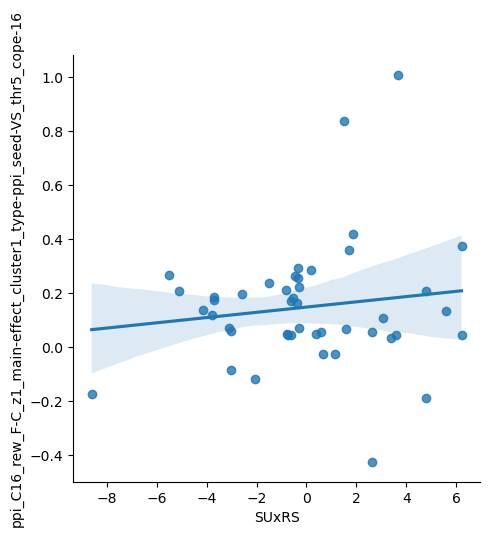

<class 'seaborn.axisgrid.FacetGrid'>


In [17]:
r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['RS'])
print("Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="RS", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SU'])
print("Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SU", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SUxRS'])
print("RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SUxRS", data=df, order=1)
plt.show()
print(type(fig))

Win_Friend and RS 
r: 0.20501705002972334 ; p: 0.18722557635419232


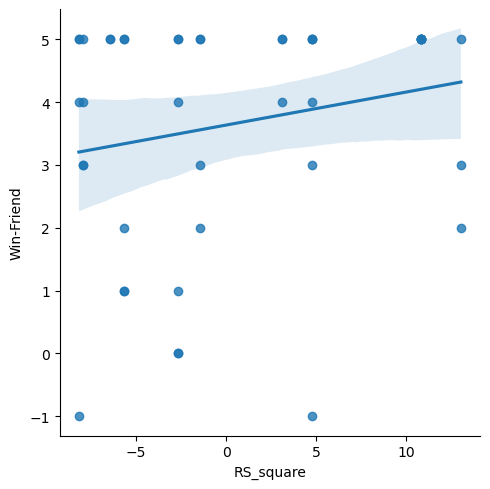

<class 'seaborn.axisgrid.FacetGrid'>
Win_Comp and RS 
r: -0.18484154885278742 ; p: 0.23537405017761157


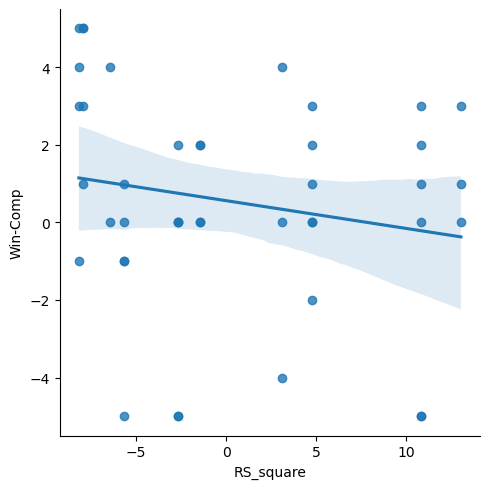

<class 'seaborn.axisgrid.FacetGrid'>


In [6]:
r,p = stats.pearsonr(df_psr['Win-Friend'], df_psr['RS_square'])
print("Win_Friend and RS \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="Win-Friend",x="RS_square", data=df_psr, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df_psr['Win-Comp'], df_psr['RS_square'])
print("Win_Comp and RS \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="Win-Comp",x="RS_square", data=df_psr, order=1)
plt.show()
print(type(fig))

Substance Use correlation with VS to aTPJ connectivity when winning vs losing with Friend v Stranger 
r: 0.3549874910006191 ; p: 0.016719144394221473


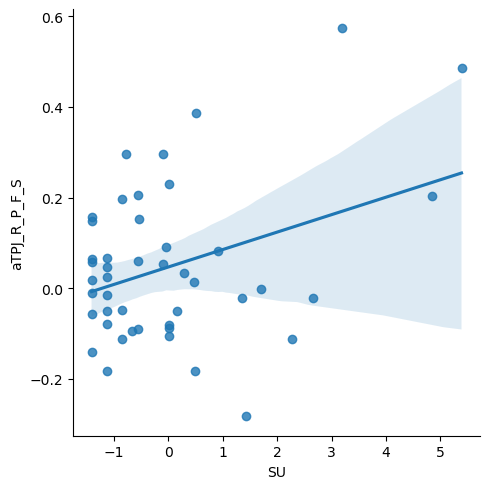

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger 
r: 0.2864204482062377 ; p: 0.05645896676702221


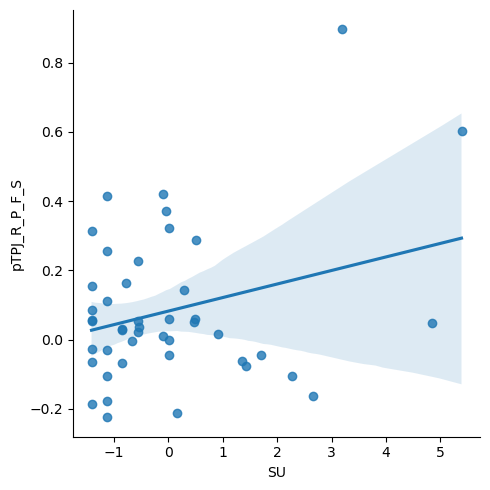

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger 
r: -0.10446883062314251 ; p: 0.5049704965742108


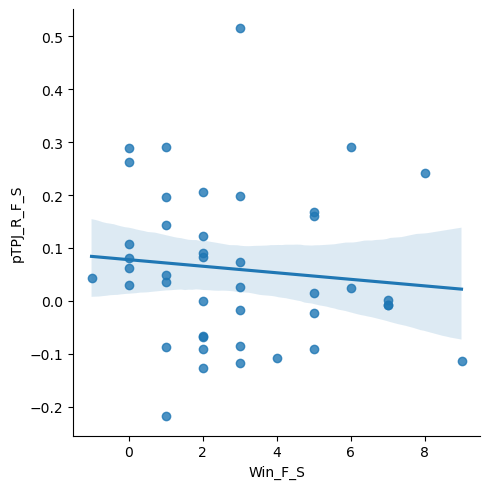

<class 'seaborn.axisgrid.FacetGrid'>


In [7]:
r,p = stats.pearsonr(df['aTPJ_R_P_F_S'], df['SU'])
print("Substance Use correlation with VS to aTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="aTPJ_R_P_F_S",x="SU", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['pTPJ_R_P_F_S'], df['SU'])
print("Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="pTPJ_R_P_F_S",x="SU", data=df, order=1)
plt.show()
print(type(fig))



r,p = stats.pearsonr(df_psr['pTPJ_R_F_S'], df_psr['Win_F_S'])
print("Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="pTPJ_R_F_S",x="Win_F_S", data=df_psr, order=1)
plt.show()
print(type(fig))


Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: -0.08156972693500016 ; p: 0.6858686472949822


Difference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: 0.13854329295082898 ; p: 0.4820056174544579


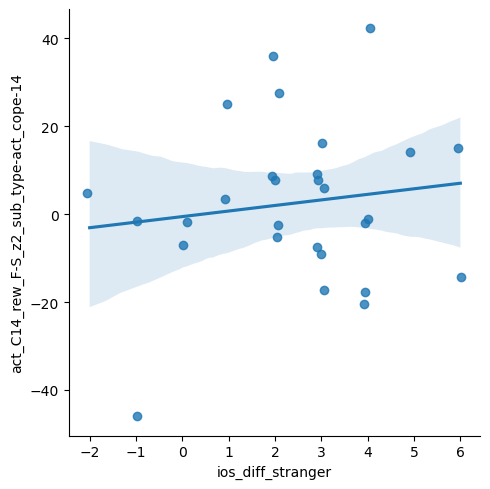

<class 'seaborn.axisgrid.FacetGrid'>


Difference b/w friend and stranger for: Closeness rating vs STG activation -  r: 0.2066830712620915 ; p: 0.18358906979908687


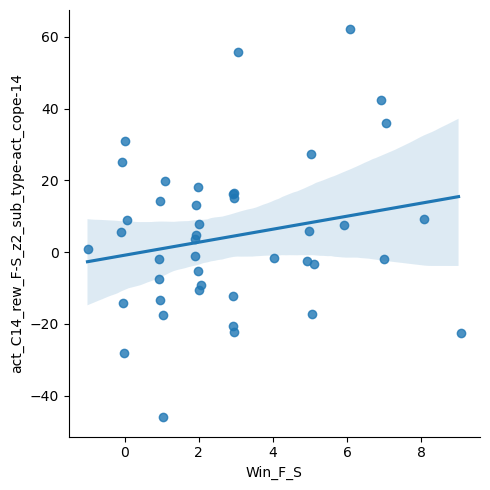

<class 'seaborn.axisgrid.FacetGrid'>


In [22]:
r,p = stats.pearsonr(df_both['Win_F_S'], df_both['ios_diff_stranger'])
print("Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(df_ios['act_C14_rew_F-S_z2_sub_type-act_cope-14'], df_ios['ios_diff_stranger'])
print("\n\nDifference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='ios_diff_stranger',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_ios, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

r,p = stats.pearsonr(df_psr['Win_F_S'], df_psr['act_C14_rew_F-S_z2_sub_type-act_cope-14'])
print("\n\nDifference b/w friend and stranger for: Closeness rating vs STG activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='Win_F_S',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_psr, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

In [41]:
os.chdir('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward')
#Make a list of all the SR Files
SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

#Make a list of Dataframes
ratings_list=[]
for f in SR_flist:
    sub=re.search('sub(.*)_',f).group(1)
    if any(i.isdigit() for i in sub):
        tmp_df=pd.read_csv(f)
        tmp_df['sub']=sub
        if len(tmp_df)==6:
            ratings_list.append(tmp_df)
#Concatonate the DataFrames together
srpr_df=pd.concat(ratings_list)
srpr_df=srpr_df.reset_index(drop=True)
#srpr_df['Rating'].astype(float)


#sort by Trait, then Partner
#srpr_df.groupby(by = ['sub','Partner','Trait']).mean()

list(set(srpr_df['sub'].values) - set(df_psr['sub'].values))

['1002',
 '1294',
 '1301',
 '1019',
 '3176',
 '1248',
 '1007',
 '1276',
 '3116',
 '3189',
 '3140',
 '1021',
 '1249',
 '3143',
 '1012',
 '1286',
 '1009',
 '3218',
 '3212',
 '1010',
 '3166',
 '1255',
 '3152',
 '3206',
 '1006',
 '3190',
 '3186',
 '3199',
 '3170',
 '3173',
 '1011',
 '3210',
 '1015',
 '3125',
 '3200',
 '3164',
 '1300',
 '1242',
 '1244',
 '1243',
 '1303',
 '1001',
 '3167',
 '3122',
 '1016',
 '1013']

In [55]:
# for l in 1:len(srpr_df['sub']):
#     sub = (df_psr['sub'])
#     if srpr.sub[l]

srpr_df['sub']=srpr_df['sub'].astype(int)
srpr_df_dropped=srpr_df[srpr_df['sub'].isin(list(df_psr['sub'].values))]
len(srpr_df_dropped)

240

In [58]:
srpr_anova = AnovaRM(srpr_df_dropped, 'Rating', 'sub', within=['Partner', 'Trait'])
srpr_results = srpr_anova.fit()

print(srpr_results)

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
Partner        4.8327 2.0000 78.0000 0.0105
Trait         70.9694 1.0000 39.0000 0.0000
Partner:Trait 35.2770 2.0000 78.0000 0.0000



C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\3542948555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srpr_df_dropped['partner']=srpr_df_dropped['Partner'].map(partner)
C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\3542948555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srpr_df_dropped['Outcome']=srpr_df_dropped['Trait'].map(Trait)


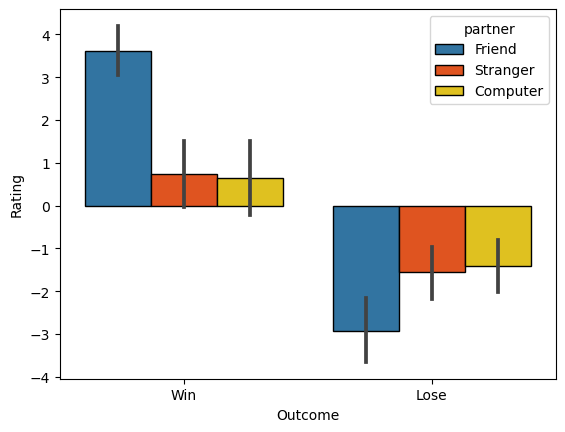

In [61]:
Trait = {0:'Win', 1:'Lose'}
partner = {3:'Friend',2:'Stranger',1:'Computer'}
srpr_df_dropped['partner']=srpr_df_dropped['Partner'].map(partner)
srpr_df_dropped['Outcome']=srpr_df_dropped['Trait'].map(Trait)
srpr_df_dropped
fig = sns.barplot(y='Rating',x='Outcome',hue='partner', data=srpr_df_dropped, palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth = 1)
plt.savefig('../../istart-sharedreward/derivatives/Figures/partner_ratings_anova.svg')
plt.show()

In [75]:
ratings_lm = ols("Win_F_C ~ SU + RS + RS_square + SU:RS + SU:RS_square", data=df_psr).fit()
df_psr.to_csv('../../istart-sharedreward/derivatives/df_psr.csv', index = False)

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Win_F_C   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1.805
Date:                Fri, 12 May 2023   Prob (F-statistic):              0.136
Time:                        17:17:54   Log-Likelihood:                -103.86
No. Observations:                  43   AIC:                             219.7
Df Residuals:                      37   BIC:                             230.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.1852      0.464      6.861      0.000       2.245       4.126
SU               0.0405      0.363      0.112      0.912      -0.695       0.776
RS               0.2198      0.166      1.322      0.194      -0.117       0.557
RS_square        0.1403      0.068      2.068      0.046       0.003       0.278
SU:RS           -0.1442      0.154     -0.936      0.355      -0.456       0.168
SU:RS_square     0.0239      0.051      0.474      0.639      -0.078       0.126
==============================================================================
Omnibus:                        0.006   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.159
Skew:                          -0.008   Prob(JB):                        0.924
Kurtosis:                       2.702   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
iosxSU = df_ios.ios_diff_stranger * df_ios.SU
df_ios['iosxSU'] = iosxSU

iosxRS = df_ios.ios_diff_stranger * df_ios.RS
df_ios['iosxRS'] = iosxRS

iosxRS_square = df_ios.ios_diff_stranger * df_ios.RS_square
df_ios['iosxRS_square'] = iosxRS_square


ratings_lm = ols("pTPJ_R_P_F_S ~ ios_diff_stranger + SU + RS + RS_square + iosxSU + iosxRS + iosxRS_square + SUxRS + SUxRS_sq + tsnr + fd_mean", data=df_ios).fit()

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

#exporting matrix of regressors, and VS-pTPJ connectivity data for friend v stranger contrasts (col 1. reward; col 2. reward v punishment)

df_mat = df_ios[['sub','ios_diff_stranger','SU','RS','RS_square','iosxSU','iosxRS','iosxRS_square','SUxRS','SUxRS_sq','tsnr','fd_mean']].copy()
df_mat.to_csv('../../istart-sharedreward/derivatives/palm_ios/df_mat.csv', index = False) #note: column for main effect added manually after export
df_palm_ppi = df_ios[['pTPJ_R_F_S','pTPJ_R_P_F_S']].copy()
df_palm_ppi.to_csv('../../istart-sharedreward/derivatives/palm_ios/df_palm_ppi.csv', index = False, header = False)

C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\2363003398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ios['iosxSU'] = iosxSU
C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\2363003398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ios['iosxRS'] = iosxRS
C:\Users\tup54227\AppData\Local\Temp\ipykernel_8276\2363003398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [14]:
df_TPJ = df[['sub','aTPJ_R_P_F_C', 'aTPJ_R_P_F_S','pTPJ_R_P_F_C','pTPJ_R_P_F_S']].copy()
df
#len(df_TPJ)
df_TPJ.to_excel('../../istart-sharedreward/derivatives/df_TPJ.xlsx', index = False)

In [15]:
len(df_TPJ)

45